In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(f'../DATA/global_economy.csv')
df['Gdp_Per_Capita'] = df['GDP'] / df['Population']
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

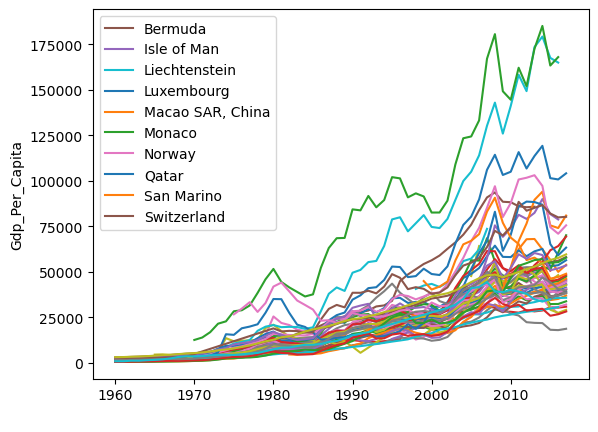

In [4]:
richest_50 = df.groupby('unique_id')['Gdp_Per_Capita'].max().sort_values(ascending=False)[:50]
richest = df.groupby('unique_id')['Gdp_Per_Capita'].max().sort_values(ascending=False)[:10]
for country in df['unique_id'].unique():
    if country in richest:
        sns.lineplot(df[df['unique_id'] == country], x='ds', y= 'Gdp_Per_Capita', label=country)
    elif country in richest_50:
        sns.lineplot(df[df['unique_id'] == country], x='ds', y= 'Gdp_Per_Capita')

<Axes: xlabel='ds', ylabel='Gdp_Per_Capita'>

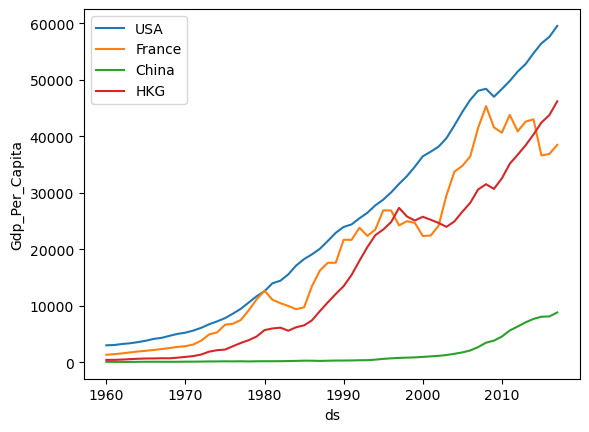

In [5]:
sns.lineplot(df[df['unique_id'] == 'United States'], x='ds', y= 'Gdp_Per_Capita', label='USA')
sns.lineplot(df[df['unique_id'] == 'France'], x='ds', y= 'Gdp_Per_Capita', label='France')
sns.lineplot(df[df['unique_id'] == 'China'], x='ds', y= 'Gdp_Per_Capita', label='China')
sns.lineplot(df[df['unique_id'] == 'Hong Kong SAR, China'], x='ds', y= 'Gdp_Per_Capita', label='HKG')

In [6]:
df = pd.read_csv(f'../DATA/aus_livestock.csv')
df = df[df['unique_id'] == 'Victoria_Bulls, bullocks and steers']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,unique_id,ds,y
3036,"Victoria_Bulls, bullocks and steers",1976-07-01,109200.0
3037,"Victoria_Bulls, bullocks and steers",1976-08-01,94700.0
3038,"Victoria_Bulls, bullocks and steers",1976-09-01,95500.0
3039,"Victoria_Bulls, bullocks and steers",1976-10-01,94800.0
3040,"Victoria_Bulls, bullocks and steers",1976-11-01,94100.0


<Axes: xlabel='ds', ylabel='y'>

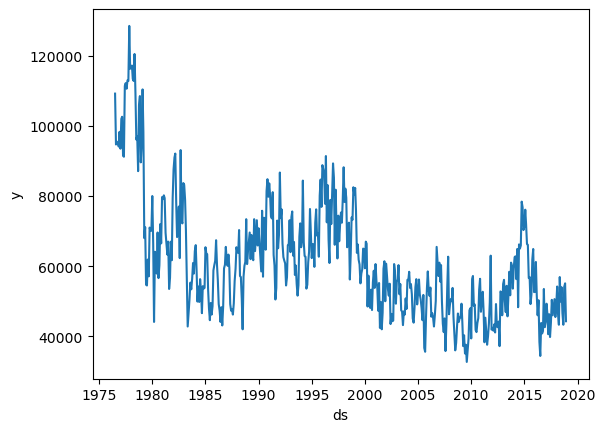

In [7]:
sns.lineplot(df, x='ds', y='y')

<Axes: xlabel='ds', ylabel='y_per_day'>

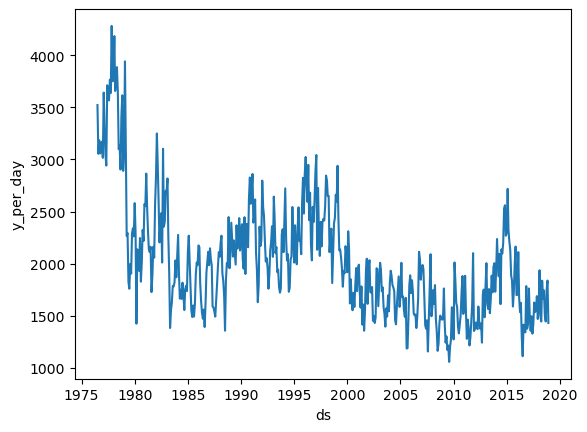

In [8]:
df['y_per_day'] = df['y'] / df['ds'].dt.days_in_month
sns.lineplot(df, x='ds', y='y_per_day')

<Axes: xlabel='ds'>

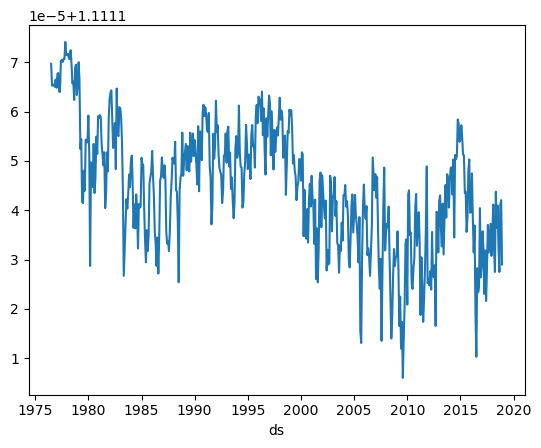

In [9]:
optim_lambda = boxcox_lambda(df["y"].to_numpy(), method="guerrero", season_length=12)
y_transformed = boxcox(df["y"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)

<Axes: xlabel='ds', ylabel='y'>

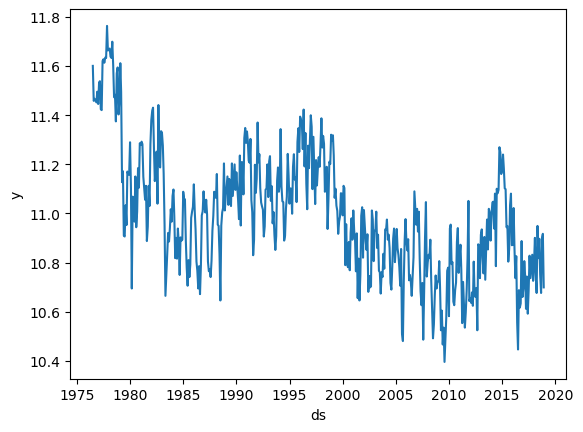

In [10]:
y_transformed = np.log(df["y"])
sns.lineplot(df, x='ds', y=y_transformed)

In [11]:
df = pd.read_csv(f'../DATA/vic_elec.csv')
df = df[df['unique_id'] == 'Demand']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,unique_id,y,Holiday
0,2012-01-01 00:00:00,Demand,4382.825174,True
1,2012-01-01 00:30:00,Demand,4263.365526,True
2,2012-01-01 01:00:00,Demand,4048.966046,True
3,2012-01-01 01:30:00,Demand,3877.563330,True
4,2012-01-01 02:00:00,Demand,4036.229746,True


<Axes: xlabel='ds', ylabel='y'>

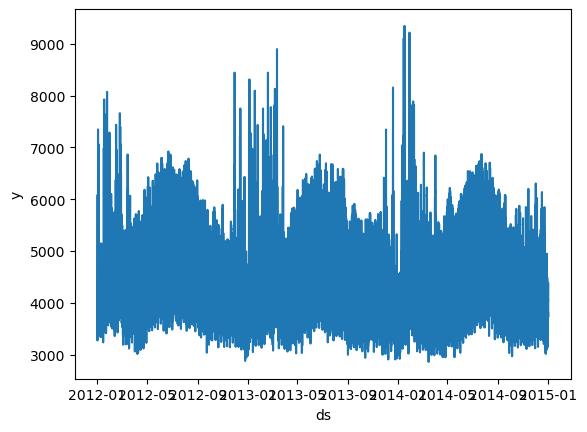

In [12]:
sns.lineplot(df, x='ds', y='y')

<Axes: xlabel='ds'>

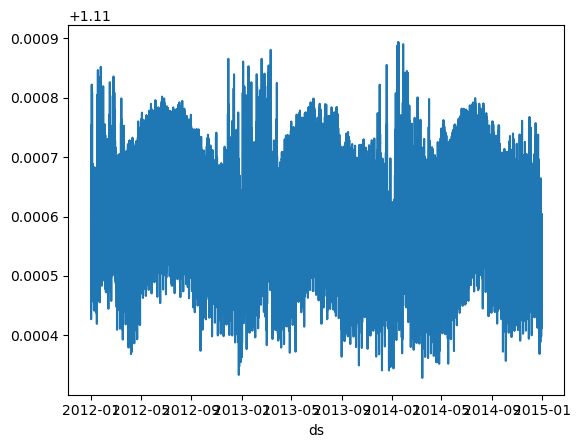

In [13]:
optim_lambda = boxcox_lambda(df["y"].to_numpy(), method="guerrero", season_length=48)
y_transformed = boxcox(df["y"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)

In [14]:
df = pd.read_csv(f'../DATA/aus_production.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


<Axes: xlabel='ds', ylabel='Gas'>

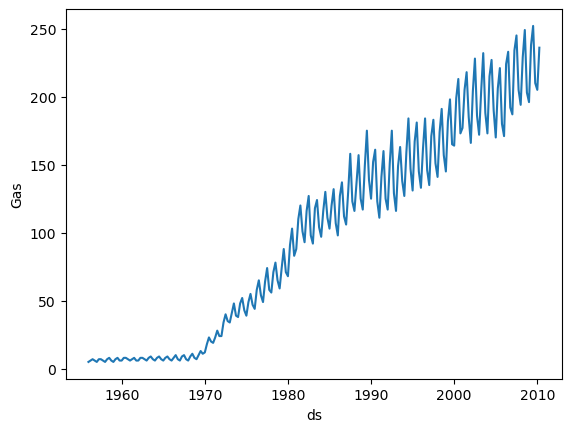

In [15]:
sns.lineplot(df, x='ds', y='Gas')

<Axes: xlabel='ds'>

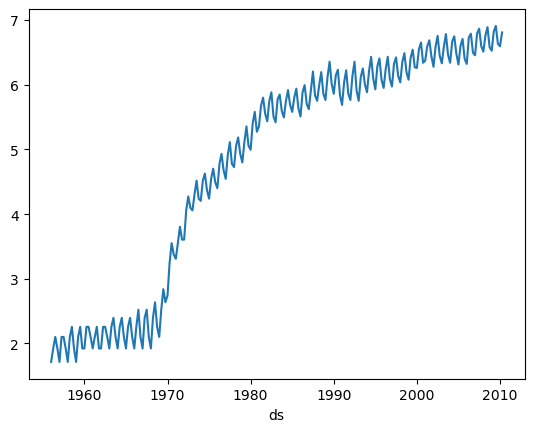

In [17]:
optim_lambda = boxcox_lambda(df["Gas"].to_numpy(), method="guerrero", season_length=4)
y_transformed = boxcox(df["Gas"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)